In [ ]:
##CB-M2-ARCH-2506-0238
## Task-2

In [ ]:
# 1. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix



In [ ]:
# STEP 1: Upload the CSV file (from your computer)
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [ ]:
# STEP 2: Load the dataset using pandas
import pandas as pd

data = pd.read_csv("train.csv")
print("Shape:", data.shape)
data.head()


Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Step 2: Drop Unused Columns (Safely)
data.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True, errors='ignore')


In [ ]:
# Step 3: Fill Missing Values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-18-1622214360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-18-1622214360.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Step 4: Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # male=1, female=0
data['Embarked'] = le.fit_transform(data['Embarked'])  # C=0, Q=1, S=2


In [ ]:
# Step 5: Split Features and Target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Drop the 'Name' column as it is not a numerical feature
X = X.drop('Name', axis=1)

# Polynomial Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Scale Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 7: Train Models
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Lasso
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import time

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
start = time.time()
log_reg.fit(X_train_scaled, y_train)
end = time.time()
log_train_time = end - start
y_pred_log = log_reg.predict(X_test_scaled)

# SGD Classifier
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
start = time.time()
sgd_clf.fit(X_train_scaled, y_train)
end = time.time()
sgd_train_time = end - start
y_pred_sgd = sgd_clf.predict(X_test_scaled)

# Ridge Classifier
ridge_clf = RidgeClassifier()
start = time.time()
ridge_clf.fit(X_train_scaled, y_train)
end = time.time()
ridge_train_time = end - start
y_pred_ridge = ridge_clf.predict(X_test_scaled)

In [ ]:
# Step 8: Evaluate Models
from sklearn.metrics import f1_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("Ridge Classifier Accuracy:", accuracy_score(y_test, y_pred_ridge))

print("\nClassification Report (LogReg):")
print(classification_report(y_test, y_pred_log))

print("\nTraining Times (seconds):")
print(f"Logistic Regression: {log_train_time:.3f}")
print(f"SGD Classifier: {sgd_train_time:.3f}")
print(f"Ridge Classifier: {ridge_train_time:.3f}")


Logistic Regression Accuracy: 0.8100558659217877
SGD Classifier Accuracy: 0.5363128491620112
Ridge Classifier Accuracy: 0.8212290502793296

Classification Report (LogReg):
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Training Times (seconds):
Logistic Regression: 0.161
SGD Classifier: 0.033
Ridge Classifier: 0.010


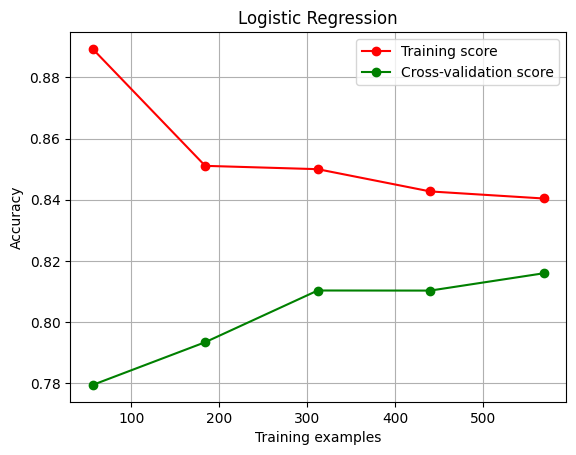

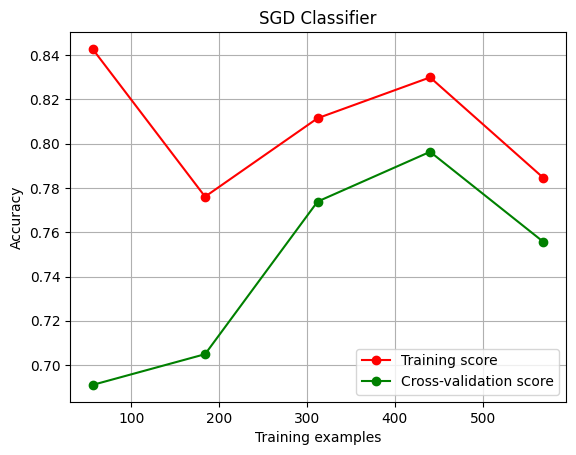

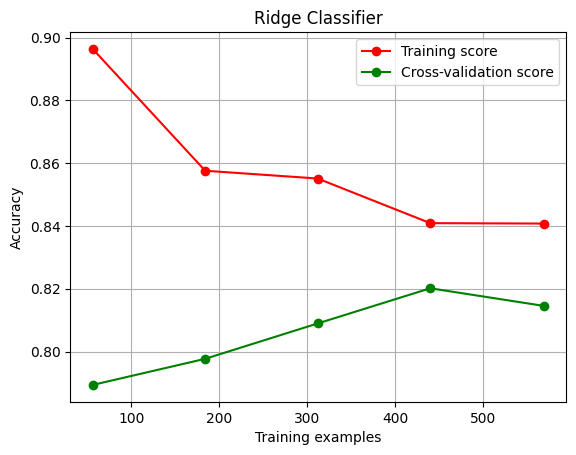

In [ ]:
# Step 9: Plot Learning Curves
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train_scaled, y_train, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(log_reg, "Logistic Regression")
plot_learning_curve(sgd_clf, "SGD Classifier")
plot_learning_curve(ridge_clf, "Ridge Classifier")


In [ ]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}

grid_search = GridSearchCV(SGDClassifier(loss='log_loss', max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_poly, y_train)
print("Best alpha for SGDClassifier:", grid_search.best_params_)


Best alpha for SGDClassifier: {'alpha': 0.1}


/tmp/ipython-input-28-1824031984.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='Set2')


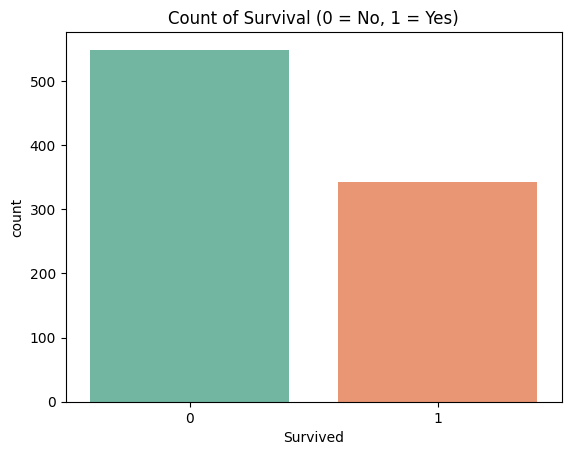

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=data, palette='Set2')
plt.title("Count of Survival (0 = No, 1 = Yes)")
plt.show()


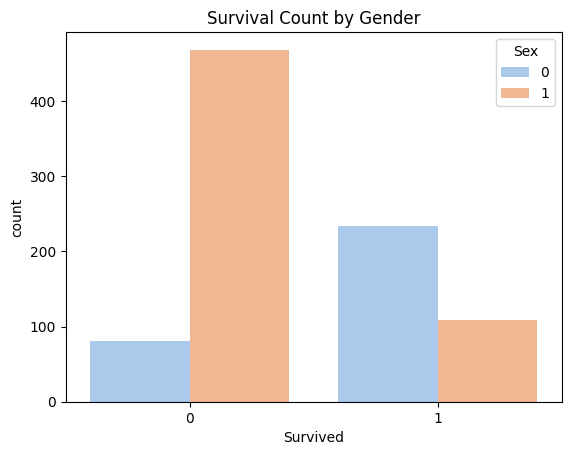

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=data, palette='pastel')
plt.title("Survival Count by Gender")
plt.show()


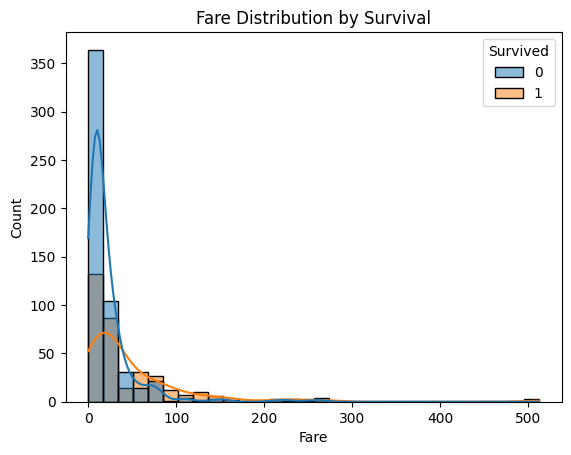

In [ ]:
sns.histplot(data=data, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Fare Distribution by Survival")
plt.show()


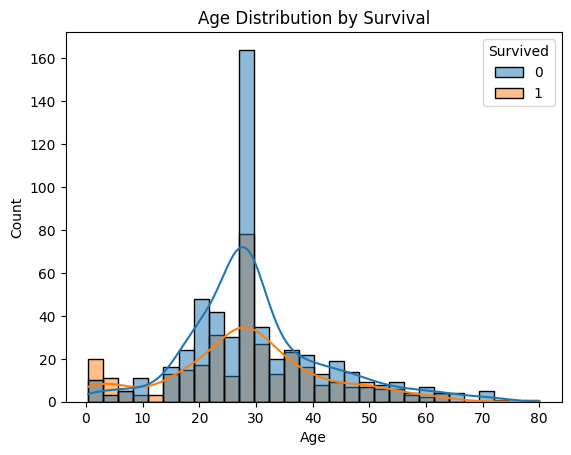

In [ ]:
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


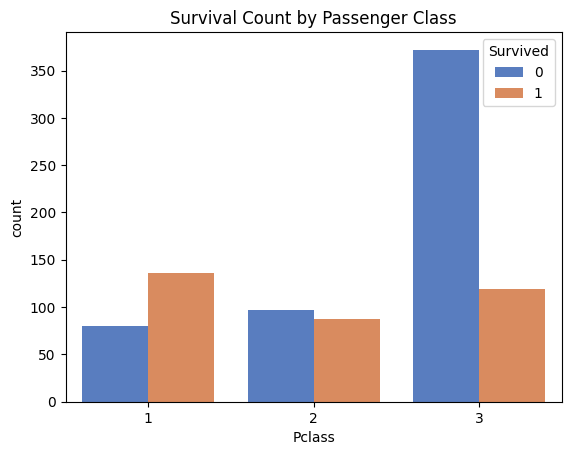

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='muted')
plt.title("Survival Count by Passenger Class")
plt.show()


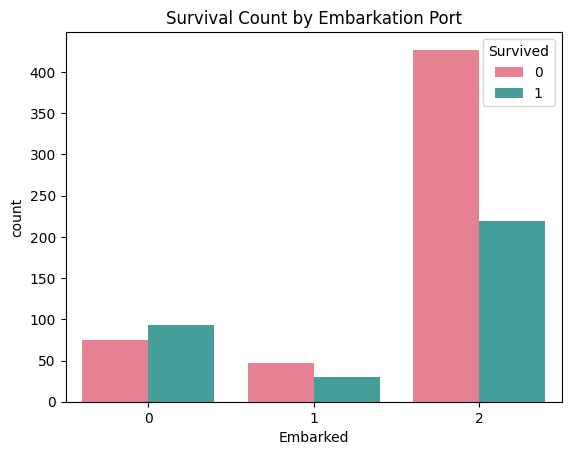

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=data, palette='husl')
plt.title("Survival Count by Embarkation Port")
plt.show()


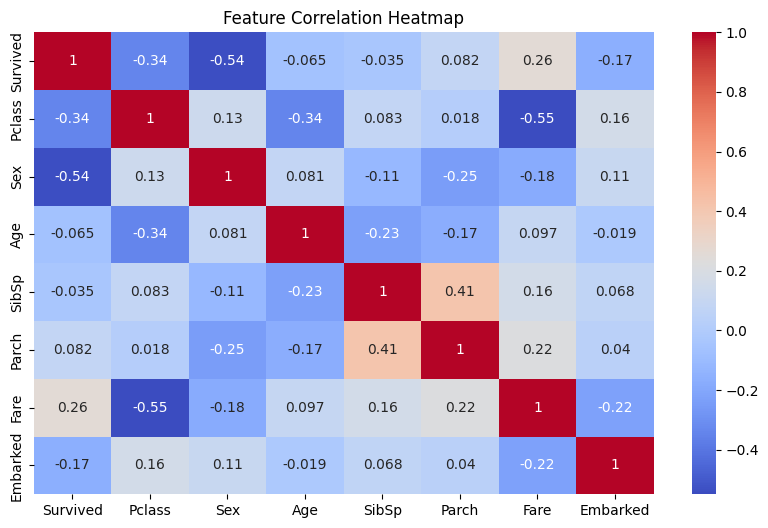

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


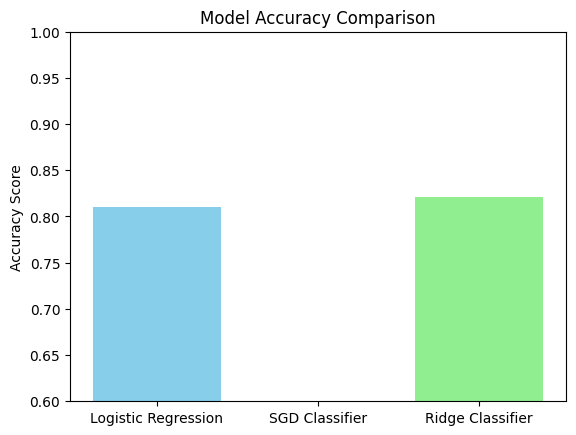

In [ ]:
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_sgd),
    accuracy_score(y_test, y_pred_ridge)
]

models = ['Logistic Regression', 'SGD Classifier', 'Ridge Classifier']

plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel('Accuracy Score')
plt.ylim(0.6, 1.0)
plt.title('Model Accuracy Comparison')
plt.show()
